# Reading Krakow data

The Krakow data comes in hdf5 format, each data set contains a variable. We use `h5py`to read the data into a dictionary-like data structure

In [1]:
import h5py
import pandas as pd

In [2]:
krakov = h5py.File("../data/observations/Krakow_AMS_PMF_moz_data.h5","r")

In [3]:
list(krakov.keys())

['BBOA',
 'CCOA',
 'DateUTC',
 'HOA',
 'LO_OOA',
 'MO_OOA',
 'OOA',
 'Org_Specs_30',
 'Packages',
 'S_fileName',
 'S_path',
 'S_waveNames',
 'V_Flag',
 'amus']

In [4]:
krakov['BBOA']

<HDF5 dataset "BBOA": shape (16273,), type "<f8">

The `Org_Specs_30` dataset holds the `m/z` values coming from the mass spectometer. 

In [5]:
krakov['Org_Specs_30']

<HDF5 dataset "Org_Specs_30": shape (16286, 93), type "<f4">

The dataset `amus`contains the `m/z`name, this can be considered as the variable name.

In [6]:
krakov['amus']

<HDF5 dataset "amus": shape (93,), type "<f4">

In [7]:
krakov['amus'][0]

12.0

We create a data frame with column names given by the `amus` data field and with rows given by the elements of the `Org_Specs_30` dataset

In [8]:
krakov_df = pd.DataFrame(krakov['Org_Specs_30'], columns = [str(int(amus)) for amus in krakov['amus']])

krakov_df

,12,13,15,16,17,18,24,25,26,27,...,111,112,113,114,115,116,117,118,119,120
0,-0.003523,0.042046,0.341372,0.018782,0.117385,0.469542,0.004058,0.026456,0.081814,0.046262,...,0.026082,0.019182,0.021737,0.015301,0.041879,0.016196,0.027027,0.014819,0.034483,0.012276
1,-0.150227,-0.008195,0.022245,0.003168,0.019797,0.079189,0.000597,-0.013850,0.063849,0.084627,...,0.016773,0.021456,0.019668,0.017158,0.043933,0.014488,0.018494,0.020011,0.025490,0.019865
2,-0.073763,-0.012552,0.004427,0.010750,0.067189,0.268756,0.004334,0.007637,0.104142,-0.009910,...,0.023564,0.006726,0.037375,0.008389,0.036188,0.011742,0.017189,0.013873,0.039163,0.019338
3,-0.118308,0.038575,0.088323,0.019541,0.122133,0.488532,-0.003255,0.020286,0.061825,0.127102,...,0.019575,0.023191,0.015848,0.012163,0.043554,0.012909,0.020370,0.013007,0.028607,0.021247
4,-0.120782,0.000762,0.020262,0.024266,0.151665,0.606660,0.005013,0.022284,0.086115,0.168124,...,0.015858,0.010879,0.032698,0.011473,0.044271,0.017018,0.012387,0.009406,0.036408,0.017181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16281,0.027184,0.050378,0.293053,0.109473,0.684207,2.736828,0.019358,0.033263,0.118950,0.379278,...,0.022693,0.013698,0.013684,0.011438,0.042559,0.023342,0.015661,0.004957,0.032708,0.014308
16282,0.060938,0.090977,0.232242,0.108391,0.677442,2.709769,0.003126,0.051296,0.170406,0.410444,...,0.034125,0.013260,0.021385,0.006524,0.024382,0.006796,0.014281,0.007714,0.012998,0.024054
16283,-0.050615,0.038717,0.399933,0.098784,0.617403,2.469612,0.015264,0.049599,0.181920,0.611250,...,0.030354,0.011480,0.014770,0.020186,0.032451,0.002959,0.019330,0.016856,0.026634,0.018623
16284,-0.067085,-0.026272,0.064406,0.108196,0.676224,2.704895,0.012406,0.020887,0.193198,0.575019,...,0.027115,0.013475,0.017990,0.008151,0.032363,0.021530,0.012372,0.013851,0.030022,0.017127


## Issue with dates

The dates are supposed to come in UTC format, but I am having problems converting them to the supposed start date 08.01.2018

In [9]:
krakov['DateUTC']

<HDF5 dataset "DateUTC": shape (16273,), type "<f8">

In [10]:
krakov['DateUTC'][0]

3598270200.0

In [11]:
import datetime as dt
dt.datetime.utcfromtimestamp(krakov['DateUTC'][0] )

datetime.datetime(2084, 1, 9, 15, 30)

We also have the issue that the variables coming from the PMF have less rows than the raw data

In [12]:
16286 - 16273

13

In contrast the difference betwen the first and last timestamp seems to coincide to 1.25 if each stamp corresponds to 1 sec

In [13]:
dt.timedelta(seconds=krakov['DateUTC'][-1] -krakov['DateUTC'][0])

datetime.timedelta(days=456, seconds=55800)

In [14]:
dt.datetime(2018,1,18) + dt.timedelta(seconds=krakov['DateUTC'][-1] -krakov['DateUTC'][0])

datetime.datetime(2019, 4, 19, 15, 30)

Which is 9 days more than what is reported in the paper (the sampling finished in 10.04.2019)

## issue with data range

If we plot value `12` we see mostly negative values, is this ok? 

<AxesSubplot:>

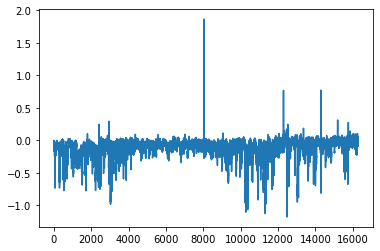

In [15]:
krakov_df['12'].plot()

# LDS experiment

I will try with this jax code to run a linear dynamical system with hidden states

In [16]:

import jax.numpy as np
import jax.random as jr

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 

from ssm.lds.models import GaussianLDS
from ssm.plots import plot_dynamics_2d


In [87]:
# define some parameters for our test_lds
emissions_dim = 93
latent_dim = 6
seed = jr.PRNGKey(32)  # different random seed!

# initialize our test lds model
test_lds = GaussianLDS(num_latent_dims=latent_dim,
                       num_emission_dims=emissions_dim,
                       seed=seed)

In [88]:
krakov_array = np.array(krakov['Org_Specs_30'])
krakov_array = krakov_array - np.mean(krakov_array, axis=0)
krakov_array = krakov_array / np.std(krakov_array,axis=0)
# krakov_array = np.expand_dims(krakov_array,axis=0)
krakov_array.shape
np.argwhere(np.isnan(krakov_array))

DeviceArray([], dtype=int32)

In [89]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
lps, fitted_lds, posteriors = test_lds.fit(krakov_array, method="em",key=seed)

  0%|          | 0/100 [00:00<?, ?it/s]

AssertionError: NaNs in marginal log probability

In [85]:
posteriors.mean()[0].shape

(16286, 2)

In [86]:
import matplotlib.pyplot as plt
posteriors.mean()[0]

DeviceArray([[nan, nan],
             [nan, nan],
             [nan, nan],
             ...,
             [nan, nan],
             [nan, nan],
             [nan, nan]], dtype=float32)

Thus it is challenging out of the box, I could try some more robust implementations.